<a href="https://colab.research.google.com/github/KyleSprague/DCS_210/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse") 
install.packages("fivethirtyeight") 
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("tidyverse") 
library("fivethirtyeight") 
library("scales")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
glimpse(college_recent_grads)

Rows: 173
Columns: 21
$ rank                        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…
$ major_code                  <int> 2419, 2416, 2415, 2417, 2405, 2418, 6202, …
$ major                       <chr> "Petroleum Engineering", "Mining And Miner…
$ major_category              <chr> "Engineering", "Engineering", "Engineering…
$ total                       <int> 2339, 756, 856, 1258, 32260, 2573, 3777, 1…
$ sample_size                 <int> 36, 7, 3, 16, 289, 17, 51, 10, 1029, 631, …
$ men                         <int> 2057, 679, 725, 1123, 21239, 2200, 2110, 8…
$ women                       <int> 282, 77, 131, 135, 11021, 373, 1667, 960, …
$ sharewomen                  <dbl> 0.1205643, 0.1018519, 0.1530374, 0.1073132…
$ employed                    <int> 1976, 640, 648, 758, 25694, 1857, 2912, 15…
$ employed_fulltime           <int> 1849, 556, 558, 1069, 23170, 2038, 2924, 1…
$ employed_parttime           <int> 270, 170, 133, 150, 5180, 264, 296, 553, 1…
$ employed_fulltim

In [16]:
?college_recent_grads

##KEY QUESTIONS TO ANSWER: 

Which major has the lowest unemployment rate? <br> 
Which major has the highest percentage of women <br> 
How do the distributions of median income compare across major categories? <br> 
Do women tend to choose majors with lower or higher earnings? 



In [7]:
##CODE FOR QUESTION 1 

college_recent_grads %>% 
  arrange(unemployment_rate) %>% 
  select(rank, major, unemployment_rate) %>%
  mutate(unemployment_rate = percent(unemployment_rate))
  

rank,major,unemployment_rate
<int>,<chr>,<chr>
53,Mathematics And Computer Science,0.00000%
74,Military Technologies,0.00000%
84,Botany,0.00000%
113,Soil Science,0.00000%
121,Educational Administration And Supervision,0.00000%
15,Engineering Mechanics Physics And Science,0.63343%
20,Court Reporting,1.16897%
120,Mathematics Teacher Education,1.62028%
1,Petroleum Engineering,1.83805%


##ANSWER TO QUESTION 1: 
The major with the lowest unemployment rate is a tie between Mathematics and Computer Science, Military Technologies, Botany, Soil Science, and Educational Administration and Supervision.

In [9]:
##code for question 2 (labelled as number "1."): 

college_recent_grads %>% 
  arrange(desc(sharewomen)) %>% 
  select(major, total, sharewomen) %>% 
  top_n(3)

Selecting by sharewomen


major,total,sharewomen
<chr>,<int>,<dbl>
Early Childhood Education,37589,0.9689537
Communication Disorders Sciences And Services,38279,0.9679981
Medical Assisting Services,11123,0.9278072


## "1." Which major has the highest percentage of women?

The top majors for women in terms of the percentage of graduates in the major are, as given by

```
college_recent_grads %>% 
  arrange(desc(sharewomen)) %>% 
  select(major, total, sharewomen) %>% 
  top_n(3)
``` 

Early Childhood Education, Communication Disorders Sciences and Services, and Medical Assisting Services. 



##ANSWER TO QUESTION 2 

The reason people use median income for a group of people instead of the mean is to avoid outliers that skew the data set. For example, you could have a communications major who comes from a very wealthy family and got a job at their family's financial firm as an executive, thereby increasing their income drastically over what it would have been outherwise. This person then represents an outlier that would be accounted for by the mean calculation but unaccounted for when working with them median. The mean would thus not be representative of the effect of the major choice on income, unlike the median.

major_number
<int>
173


major,median
<chr>,<dbl>
Petroleum Engineering,110000
Mining And Mineral Engineering,75000
Metallurgical Engineering,73000
Naval Architecture And Marine Engineering,70000
Chemical Engineering,65000
Nuclear Engineering,65000
Actuarial Science,62000
Astronomy And Astrophysics,62000
Mechanical Engineering,60000


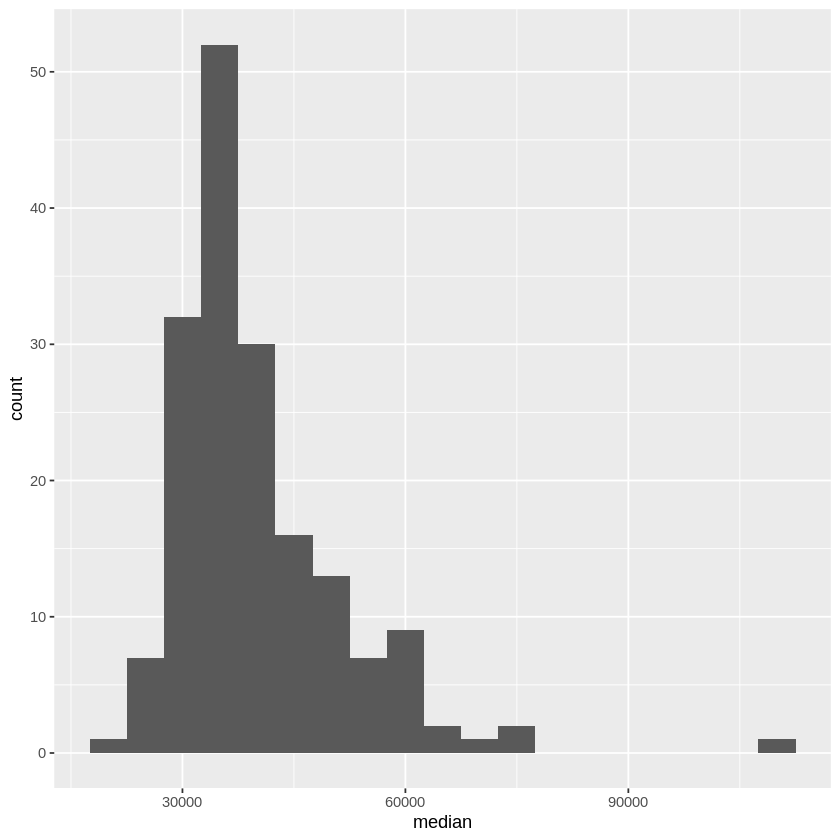

In [40]:
college_recent_grads %>% 
  count(major) %>%
  summarize(major_number = sum(n))  

college_recent_grads %>%
  select(major, median) %>% 
  group_by(major)

#there are 173 different majors so count below represents the number of majors 
#or rows at the same median income level


ggplot(data = college_recent_grads, mapping = aes(x=median)) + 
  geom_histogram(binwidth = 5000) 


##ANSWER TO QUESTION 3

The binwidth I chose was 5000. The reason for this is that if you choose binwidth = 1000, the x-axis ticks take on scientific representations, which is much more difficult to read for the average viewer. Further, I felt that the 5000 plot was able to retain the essence of the binwidth = 1000 plot. If I could pick an ideal value, it would be something like binwidth = 3000; the reason for this being that if you look at the median income section of the dataframe, the income range between a given major and the major with the nearest median income is often 1000 or 0. However, as said before these values give us an x-axis with scientific notation. 3000 represents a small value where scientific notation is no longer necessitated. *************

In [41]:
college_recent_grads %>% 
  summarize(min = min(median), max = max(median),
    mean = mean(median), med = median(median), 
    sd = sd(median), 
    q1 = quantile(median, probs = 0.25),
    q3 = quantile(median, probs = 0.75))

min,max,mean,med,sd,q1,q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22000,110000,40151.45,36000,11470.18,33000,45000


##ANSWER TO QUESTION 4 

You will notice in the above graph for question 3 that we have an oulier at 125,000 for median income. Petroleum Engineering majors have a much larger median income than the rest of the majors; this leads to a skew in our meanm which is the mean of all values in the median column. When the mean is skewed, the standard deviation is also skewed, so we can also ignore this statistic. The median is not a very good measure of distribution because it only gives us information about the center of the data set. The interquartile range values q1 and q3 are calculated using the median value on each half of the distribution, which means they give an accurate central point for the two halves of the data set regardless of outlier presence. Further, these points tell us about where most of the information in the data set falls (between 33000 and 45000), and thus give us the best idea of how the data is distributed.  

Statistic Output:

```
A tibble: 1 × 7
min	max	mean	med	sd	q1	q3
<dbl>	<dbl>	<dbl>	<dbl>	<dbl>	<dbl>	<dbl>
22000	110000	40151.45	36000	11470.18	33000	45000

```



In [ ]:
##Code for question 5